# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 24 марта 18:00 Сдача **очная** на занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$ w_i^k = w_{i-1}^k-\alpha\left[\frac{1}{N}\sum \limits_{i}^{n} x_{i}^k(a_i-y_i) + \frac{2}{C}w^k_{i-1}\right]$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$ w_i^k = w_{i-1}^k-\alpha\left[\frac{1}{N}\sum \limits_{i}^{n} x_{i}^k(a_i-y_i) + \frac{2}{C}w^k_{i-1}\right]$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [122]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [123]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [1]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    X_batch = X[0]
    y_batch = y[0]
    if shuffle:
        tmp = np.random.permutation(X.shape[0])
    else:
        tmp = np.array(X.shape[0])
    tmp = tmp.reshape(X.shape[0] // batch_size, batch_size)
    for i in range(0, tmp.shape[0]):
        X_batch = X[tmp[i]]
        y_batch = y[tmp[i]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [2]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    ## Your code Here
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = 1/C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss = self.predict(X_batch) - y_batch
            loss = np.dot(loss.T,loss)
            loss = np.mean(loss) + np.dot(self.weights.T,self.weights) * self.C
            loss /= 2
        if self.model_type == 'log_reg':
            prediction = self.predict(X_batch)
            loss = (1 - y_batch * np.log(1 - prediction)) - (y_batch * np.log(prediction))
            loss = np.mean(loss) + np.dot(self.weights.T, self.weights) * self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss_grad = self.predict(X_batch) - y_batch
            loss_grad = np.dot(loss_grad, X_batch) + 2 * self.weights * self.C
            loss_grad = np.mean(loss_grad, axis = 0)
        if self.model_type == 'log_reg':
            loss_grad = self.predict(X_batch) - y_batch
            loss_grad = np.dot(loss_grad, X_batch) + 2 * self.weights * self.C
            loss_grad = np.mean(loss_grad, axis = 0)
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        X = np.concatenate((X, np.ones(X.shape[0]).reshape(-1, 1)), axis=1)
        # Нужно инициализровать случайно веса
        self.weights = np.random.rand(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_loss = self.calc_loss(X_batch, y_batch)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X,self.weights)
        if self.model_type == 'log_reg':
            y_hat = sigmoid(np.dot(X,self.weights))
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [6]:
def plot_decision_boundary(clf):
    a = clf.weights.flatten()
    x = np.linspace(-4, 4)
    y = (-a[1]/a[0]) * x
    plt.plot(x, y, label='model = {}'.format(clf.model_type))
    
    plt.legend()

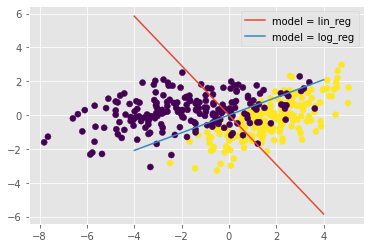

In [7]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
my_model = MySGDClassifier(batch_generator, model_type = 'lin_reg')
my_model.fit(X,y)

plot_decision_boundary(my_model)

model = MySGDClassifier(batch_generator, model_type='log_reg')
model.fit(X, y)
plot_decision_boundary(model)

X = (X - np.mean(X, axis=0))

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [8]:
from sklearn.datasets import make_classification

In [9]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

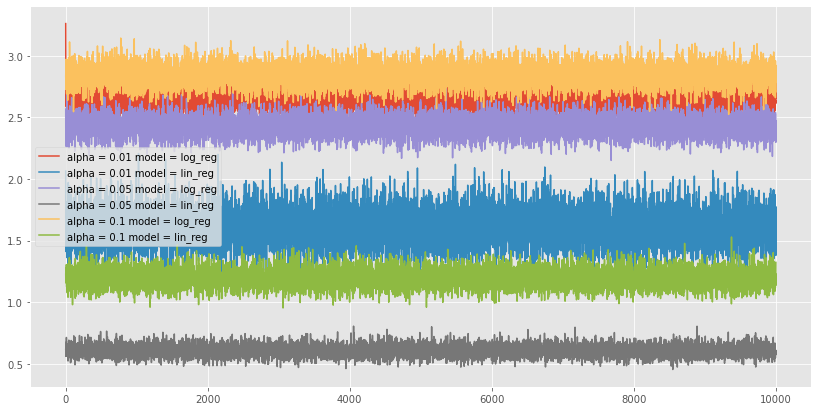

In [32]:
plt.figure(figsize=(14, 7))
alphas = (0.01, 0.05, 0.1)
N = 100

for alpha in alphas:
    myclf = MySGDClassifier(batch_generator, alpha=alpha, model_type='log_reg')
    myclf.fit(X, y)
    steps = len(myclf.errors_log['loss'])
    mean_losses = []
    for i in range(steps // N):
        s = np.sum(myclf.errors_log['loss'][i*N:(i+1)*N]) / N
        mean_losses.append(s)
        
    model_type = 'log_reg'
    plt.plot(np.arange(len(mean_losses)), mean_losses, label='alpha = {} model = {}'.format(alpha, model_type))
    
    myclf = MySGDClassifier(batch_generator, alpha=alpha, model_type='lin_reg')
    myclf.fit(X, y)
    steps = len(myclf.errors_log['loss'])
    mean_losses = []
    for i in range(steps // N):
        s = np.sum(myclf.errors_log['loss'][i*N:(i+1)*N]) / N
        mean_losses.append(s)
        
    model_type = 'lin_reg'
    plt.plot(np.arange(len(mean_losses)), mean_losses, label='alpha = {} model = {}'.format(alpha, model_type))
    
plt.legend()
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in double_scalars
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


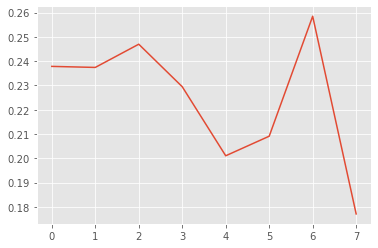

In [10]:
wghts = []
C = np.logspace(3, -3, 10)
for c in C:
    clf = MySGDClassifier(batch_generator, C=c, max_epoch=1,model_type='lin_reg')
    clf.fit(X, y)
    wghts.append(np.mean(np.abs(clf.weights)))
plt.plot(wghts)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in double_scalars


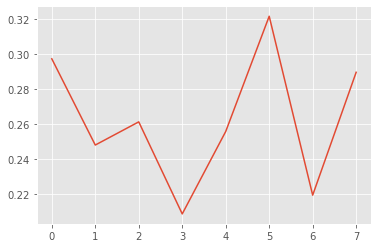

In [11]:
wghts = []
C = np.logspace(3, -3, 10)
for c in C:
    clf = MySGDClassifier(batch_generator, C=c, max_epoch=1, model_type='log_reg')
    clf.fit(X, y)
    wghts.append(np.mean(np.abs(clf.weights)))
plt.plot(wghts)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [12]:
doc_to_title = {}
with open('docs_titles.tsv\\docs_titles.tsv',encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [13]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [14]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [15]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [16]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id = new_doc['pair_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, pair_id))

In [17]:
X_test = []
y_test = []
pair_ids=set()
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title, pair_id) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, pair_id = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)
X_test = np.concatenate((X_test, np.ones(X_test.shape[0]).reshape(-1, 1)), axis=1)

(16627, 15) (16627,)


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [34]:
import random as rd
tr = []
rd.seed()
for i in range(40):
    tr.append(rd.randint(1,120))
X_train_val = []
y_train_val = []
X_test_val = []
y_test_val = []
for i in range(len(X_train)):
    if groups_train[i] in tr:
        X_test_val.append(X_train[i])
        y_test_val.append(y_train[i])
    else:
        X_train_val.append(X_train[i])
        y_train_val.append(y_train[i])
X_train_val = np.array(X_train_val)
y_train_val = np.array(y_train_val)
X_test_val = np.array(X_test_val)
y_test_val = np.array(y_test_val)
X_test_val = np.concatenate((X_test_val, np.ones(X_test_val.shape[0]).reshape(-1, 1)), axis=1)
print(X_train_val.shape,y_train_val.shape,X_test_val.shape,y_test_val.shape)

(8353, 15) (8353,) (3337, 16) (3337,)


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [19]:
alphas = [0.001, 0.0001]
C_set=[ 50, 100, 500, 1000,5000]
epoch=[5,10,20]
for a in alphas:
    print('cur step = ', a)
    for C_tmp in C_set:
        for ep in epoch:
            myclf = MySGDClassifier(batch_generator, alpha=a, C=C_tmp, max_epoch=ep, model_type='log_reg', batch_size=2)
            myclf.fit(X_train_val, y_train_val)
            sc = f1_score(y_test_val, myclf.predict(X_test_val) > 0.8)
            if sc > -1:
                print("score: ", sc,' alpha: ', a ,' C: ', C_tmp,' max_epoch: ', ep)

cur step =  0.001
score:  0.523517382413088  alpha:  0.001  C:  50  max_epoch:  5


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log


score:  0.4684085510688837  alpha:  0.001  C:  50  max_epoch:  10
score:  0.4472608340147179  alpha:  0.001  C:  50  max_epoch:  20
score:  0.5051635111876075  alpha:  0.001  C:  100  max_epoch:  5
score:  0.4493361285814116  alpha:  0.001  C:  100  max_epoch:  10
score:  0.5414965986394558  alpha:  0.001  C:  100  max_epoch:  20
score:  0.5378917378917378  alpha:  0.001  C:  500  max_epoch:  5
score:  0.5203094777562863  alpha:  0.001  C:  500  max_epoch:  10
score:  0.4579732914375491  alpha:  0.001  C:  500  max_epoch:  20
score:  0.44313043478260866  alpha:  0.001  C:  1000  max_epoch:  5
score:  0.5105982100800753  alpha:  0.001  C:  1000  max_epoch:  10
score:  0.49979313198179565  alpha:  0.001  C:  1000  max_epoch:  20
score:  0.4914648670107185  alpha:  0.001  C:  5000  max_epoch:  5
score:  0.5068846815834768  alpha:  0.001  C:  5000  max_epoch:  10
score:  0.5202020202020201  alpha:  0.001  C:  5000  max_epoch:  20
cur step =  0.0001
score:  0.5191222570532916  alpha:  0.000

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply


score:  0.4483960948396094  alpha:  0.0001  C:  50  max_epoch:  20
score:  0.44584206848357794  alpha:  0.0001  C:  100  max_epoch:  5
score:  0.4611021069692058  alpha:  0.0001  C:  100  max_epoch:  10
score:  0.4453125  alpha:  0.0001  C:  100  max_epoch:  20
score:  0.461374154503382  alpha:  0.0001  C:  500  max_epoch:  5
score:  0.44506844506844506  alpha:  0.0001  C:  500  max_epoch:  10
score:  0.44186839413569723  alpha:  0.0001  C:  500  max_epoch:  20
score:  0.4454739843193157  alpha:  0.0001  C:  1000  max_epoch:  5
score:  0.5121731289449954  alpha:  0.0001  C:  1000  max_epoch:  10
score:  0.5038826574633305  alpha:  0.0001  C:  1000  max_epoch:  20
score:  0.4468838526912181  alpha:  0.0001  C:  5000  max_epoch:  5
score:  0.4435117173837006  alpha:  0.0001  C:  5000  max_epoch:  10
score:  0.47267244628722205  alpha:  0.0001  C:  5000  max_epoch:  20


In [25]:
#alphas = [0.001, 0.0001]
alphas = [0.001]
C_set=[100, 500, 1000]
#epoch=[5,10,15]
epoch = [10]
for a in alphas:
    print('cur step = ', a)
    for C_tmp in C_set:
        for ep in epoch:
            myclf = MySGDClassifier(batch_generator, alpha=a, C=C_tmp, max_epoch=ep, model_type='lin_reg', batch_size=10)
            myclf.fit(X_train_val, y_train_val)
            sc = f1_score(y_test_val, myclf.predict(X_test_val) > 0.8)
            if sc > -1:
                print("score: ", sc,' alpha: ', a ,' C: ', C_tmp,' max_epoch: ', ep)

cur step =  0.001
score:  0.4168096054888508  alpha:  0.001  C:  100  max_epoch:  10
score:  0.4733683420855214  alpha:  0.001  C:  500  max_epoch:  10
score:  0.07734806629834255  alpha:  0.001  C:  1000  max_epoch:  10


In [16]:
C=[ 50, 100, 500, 1000,5000]
for a in range(1, 10):
    print('cur step = ', a)
    for c in C:
        myclf = MySGDClassifier(batch_generator, alpha=(0.001*a), C=c, max_epoch=10, model_type='log_reg', batch_size=10)
        myclf.fit(X_train_val, y_train_val)
        sc = f1_score(y_test_val, myclf.predict(X_test_val) > 0.8)
        if sc > -1:
            print("score: ", sc, a*0.001, c)

cur step =  1
score:  0.56266250650026 0.001 50
score:  0.5345794392523364 0.001 100
score:  0.25278810408921937 0.001 500


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply


score:  0.3968999530295913 0.001 1000


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in double_scalars
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


score:  0.0 0.001 5000
cur step =  2
score:  0.48005698005698 0.002 50
score:  0.42814371257485034 0.002 100
score:  0.3968999530295913 0.002 500
score:  0.0 0.002 1000
score:  0.0 0.002 5000
cur step =  3
score:  0.0 0.003 50
score:  0.3993558776167471 0.003 100
score:  0.0 0.003 500
score:  0.0 0.003 1000
score:  0.0 0.003 5000
cur step =  4
score:  0.029850746268656723 0.004 50
score:  0.46130268199233715 0.004 100
score:  0.0 0.004 500


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in subtract


score:  0.0 0.004 1000
score:  0.0 0.004 5000
cur step =  5
score:  0.06775956284153005 0.005 50
score:  0.03229527104959631 0.005 100
score:  0.0 0.005 500
score:  0.0 0.005 1000
score:  0.0 0.005 5000
cur step =  6
score:  0.0 0.006 50
score:  0.01871345029239766 0.006 100
score:  0.0 0.006 500
score:  0.0 0.006 1000
score:  0.0 0.006 5000
cur step =  7
score:  0.0 0.007 50
score:  0.0 0.007 100
score:  0.0 0.007 500
score:  0.0 0.007 1000
score:  0.0 0.007 5000
cur step =  8
score:  0.3348581884720952 0.008 50
score:  0.19507908611599298 0.008 100
score:  0.0 0.008 500
score:  0.0 0.008 1000
score:  0.0 0.008 5000
cur step =  9
score:  0.12385786802030459 0.009000000000000001 50
score:  0.40277777777777773 0.009000000000000001 100
score:  0.0 0.009000000000000001 500
score:  0.0 0.009000000000000001 1000
score:  0.0 0.009000000000000001 5000


In [32]:
myclf = MySGDClassifier(batch_generator, model_type='log_reg', max_epoch=10, alpha=0.001, C=50, batch_size=10)
myclf.fit(X_train_val, y_train_val)

MySGDClassifier(C=0.02, alpha=0.001,
                batch_generator=<function batch_generator at 0x00000246FE92E168>,
                batch_size=10, max_epoch=10, model_type='log_reg')

In [35]:
scores = [[], []]
for k in range(1, 500):
    scores[0].append(f1_score(y_test_val, myclf.predict(X_test_val) > (0.5 + 0.001 * k)))
    scores[1].append(0.5 + 0.001 * k)
print(np.max(scores[0]))
best_mark = scores[1][np.argmax(scores[0])]
print(best_mark)

0.5884383088869716
0.9790000000000001


In [36]:
df = pd.DataFrame({
    'pair_id': test_data['pair_id'],
    'target': ((myclf.predict(X_test) > best_mark).flatten() + 0)
})
df.to_csv('res2.csv', index=False)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

Вроде бы все понятно, непонятно только почему скор такой низкий

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Очень интересный и сложный курс, побольше бы практики)